Please fill in your name and that of your teammate.

You:

Teammate:

# Introduction

Welcome to the fourth lab. This week the math load is lower on purpose to give you a chance to catch up on the first 3 labs before we start to _use_ all the foundations you learned so far. You may want to go back and fix your submissions with the help of the solutions, you will need the material for the exam.

This week we introduce the major data analysis library in Python: [`pandas`](https://pandas.pydata.org/docs/). You can think of it as providing **feature-rich data containers**: load your data in a `pandas` object and you will have fast access, manipulation, statistics, even math with `numpy` and plotting with `matplotlib`. Unfortunately it also has a fame of being frustrating, unintuitive and stubborn, so I suggest you spend some time practicing and download the documentation as [offline pdf](https://pandas.pydata.org/docs/pandas.pdf) for the exam.

The two main classes are `Series`, for one-dimensional data, and `DataFrame` for _tensors_. You may have heard this word before: you can think of a tensor as a generic structure for feature-based data. A zero-dimensional tensor is a scalar; a 1D tensor is a vector; a 2D vector is a matrix; 3D gives you a cube (or list of matrices), and higher dimensions are hypercubes.
You will start mostly using `DataFrame`s with 2D tables/matrices, but some methods will return (kind-of) higher-dimensional tensors (e.g. [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)).

This library is best learned hands-on, but before starting it is important to understand how the data is stored and accessed.

## The feature's perspective

Let's write a dataset of snakes. It has three fields: `head size`, `length` (in cm) and whether it is `poisonous` or not. It looks like this:

```python
snakes = [['small', 38, False],
          ['small', 62, True],
          ['medium', 55, True]]
```

This form puts the emphasis on the data points (the rows), which is an intuitive approach at first for humans to manually write down the data. We can scroll to the middle of a dataset in a CSV or text file and read one line -- in principle, if the columns are few and we remember their order.  
Accessing the data by indices can also be confusing: if you want to know whether the second snake is poisonous you should use `snakes[1][2]`, which is prone to the type of misunderstandings that lead to bugs (e.g. writing instead `[2][1]`).  
From the machine perspective this is not an issue, but this way of storing has the distinct (performance) disadvantage of having multiple types in the same data structure: here lists with strings, floats and booleans.

An alternative form to represent the data which is also very common (you already encountered it e.g. for data plotting) gives instead priority to the columns or *features*. It contains the same data but rows and columns are *transposed*:

```python
snakes = [['small', 'small', 'medium'],
          [38, 62, 55],
          [False, True, True]]
```

As you can see, with elements in the columns each feature is now in its own list, meaning we could store it in a specialized array casted to the correct data type, and enjoy a big performance boost.  
Moreover, we can now switch to a hash map (a `dict` in Python), allowing us to include the feature name and use them for indexing, making the data and its description self-contained:

```python
snakes = {'head_size' : ['small', 'small', 'medium'],
          'length'    : [38, 62, 55],
          'poisonous' : [False, True, True]}
```

Data access readability is also improved: `snakes['poisonous'][1]` does not leave room for misunderstandings, and writing `snakes[1]['poisonous']` will raise an error.  
To help us accessing elements by index we could even add an explicit "index feature", such as:

```python
snakes = {'index'     : [1, 2, 3],
          'head_size' : ['small', 'small', 'medium'],
          'length'    : [38, 62, 55],
          'poisonous' : [False, True, True]}
```

## Pandas objects

Now that you have lists of consistent type, we could use `numpy` arrays to both optimize performance and give you access to a plethora of useful methods:

```python
import numpy as np
snakes = {'head_size' : np.array(['small', 'small', 'medium'], dtype='str'),
          'length'    : np.array([38, 62, 55], dtype='float'),
          'poisonous' : np.array([False, True, True], dtype='bool')}
```

Isn't that neat? Congratulations, you just derived a naïve version of a Pandas `DataFrame`. Let's actually convert it explicitly so we can play with it:

```python
import pandas as pd
df = pd.DataFrame(snakes)
df.head() # prints first few lines of a potentially large dataframe
```

A few tips before we start:
- DataFrames are composed of Series (holding features), and each Series uses a Numpy array at its core: so anything you can do with a Numpy array can be done with Pandas structures (and more of course).
- Data always has an `index` (of class `Index`), and if you paid attention to the DB course you should know why. You can provide an index explicitly or it will generate its own as a counter.
- Accessing data with `[]` (e.g. `df['length']`) does not give direct access at the data, but returns a [copy-on-write](https://en.wikipedia.org/wiki/Copy-on-write) handler. This means that the read access is fast, but writing on it generates a _copy_ of the data. (and that is not even always true, e.g. creating a new column `df['new_col'] = 5`)
- To access the data directly by column name and index, you should use `df.loc[]` (by index and column) and `df.iloc[]` (by indices). Yes they both take square parenthesis... But data access is even more confusing than this, and you will need to do some serious practice to reliably get it to do what you want. I suggest you follow [this tutorial](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c).
- You can access the data by conditions by generating a boolean array that will hard-select the rows or columns you want. Yeah even more confusing. Writing `df['length']<60` will return a boolean numpy array with values `[True, False, True]`; to get the two true lines of the dataframe you need `df[df['length']<60]`. Do yourself a favor and check also the second part of the tutorial above ([boolean indexing](https://www.dunderdata.com/blog/selecting-subsets-of-data-in-pandas-part-2)).
- You can plot using the function `df.plot()` (takes `type=` as a parameter), and sometimes it is useful for a quick check. In almost every case though it is easier (and produces better results) to simply use `seaborn`, because it uses DataFrames natively: try `sns.barplot(data=df, y='length', x=df.index, hue='poisonous')`
- Most DataFrame methods also return the result of the computation on a copy or view on the pandas object. If you want your method calls to have persistent consequences, you should capture the output in a variable, or use the optional argument `inplace=True` (available for most methods).

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 18 points (out of 27 available) to pass** (66%).

# 1. Fundamentals

By now you should know the drill. Let's start easy:

#### 1.1 **[2pt]** Write a small DataFrame with at least 3 of the common problems you can find when dealing with unknown data.

If you need inspiration you can reuse and expand your cats and dogs dataset from lab. Loading into a dataframe should be easy: here is the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), pass the table as `data=` and the labels as `columns=` to the constructor.

In [1]:
import numpy as np
import pandas as pd
#commentary: i omitted the dtype=* argument on purpose, because this would yield errors 
# for example if an array consists or should consist only of integers and there's an error in the data
# like a "None" value, then np.array will raise an TypeError error, which I want to avoid for now

pets = {'weight'      : np.array(['NaN', 10000, 5000, 12000, 7000]), #problem: NaN
          'legs'      : np.array([5, 4, 4, 4, 4]),  #problem: could be noise or human error
          'fav_food'  : np.array(['mices', 'bones', 'fishs', 'fish', 'bone'])} #problem: human errors, one person writes the favorite food in plural form, the other in singular

df = pd.DataFrame(data=pets)

df


,weight,legs,fav_food
0,NaN,5,mices
1,10000,4,bones
2,5000,4,fishs
3,12000,4,fish
4,7000,4,bone


#### 1.2 **[1pt]** Explain with your own word why data defects mitigation is important and why it cannot ever be perfect.

Here "own word" means that copying and pasting from the slides will fail the question. Feel free to discuss around the concepts if the words come hard, just prove that you got the meaning.

**Important**: Having wrong or bad data could lead to wrong/incorrect models or even non functional models, e.g. you expect only numerical values and suddenly you get a string. The model usually (if it's not explicitly implemented on how to deal with such scenarios) will fail and return an error. 

**Not perfect**: Usually, we're dealing with large quantities of data, where it's almost impossible to fix the data (in such a way that no one is going to pay for it to fix the data because it takes too much time or it's even unfixable because the data is missing and we can't reconstruct the real value). And even if we would pay some intern to fix the data: imagine the situation where you have a sensor measuring the temperature. What if the real value of the temperature is 30°C and the sensor is measuring something like 37°C (for whatever cause) in an environment where 20°C - 40°C is the normal range of the temperature. You couldn't identify this value as an outlier but it will still be a very large noise of 7°C which could potentially make our model less accurate, if this occurs very often but it's difficult to identify because we usually never know the real value.

#### 1.3 **[1pt]** Give two reasons why to drop lines with defects rather than fixing them.

- In a situation, where there's enough data, one could drop defect lines, because we have enough data for our model to train and trying to fix the defect (usually) would take way too much time, because again, who is going to pay for it? (Of course, the remaining data should still be statistically representative!) 
- It's not fixable. Imagine we have the sensor example measuring the temperature. How would you want to fix this data, if the sensor is really defective and measured temperatures around 100°C in an environment where we have 20°C - 40°C being the only possible values.

#### 1.4 **[1pt]** Why does data quality impact learning more than data quantity? Mention one of the algorithms seen so far as an example.

If the data is of really bad quality, we can't really train a model that's representative of the whole data. Imagine we have data that **should** follow some linear model (e.g. $f(x) = 2x + 3$), but the dataset we have is just scattered around everywhere, where there is no linear model possible to grasp. Even if we have a very large set of data with bad quality, we will not be able to find some good model for our data. However, if we have like 5 entries in our data of very good quality, we'll find the model in no time with a very good precision and furthermore, the calculation of our model will take way less time. 

And here I'd also like to point out the rule of thumb in the course:


> Once the full range of values of all features related to the objective process are represented, any similar value within noise range is unlikely to lead to significant performance improvements.

I think this nails it pretty well. Our model will be way better trained if it had been trained with the full range of values of all features (which for me is something that belongs to "data quality") with less data, compared to some large quanitites of data which train our model in a small subset of the full range.




#### 1.5 **[1pt]** Convert (by hand) a categorical feature from your hand-written dataset into a numerical one using binary encoding.

If your dataset does not have a categorical feature yet, go ahead and add one. Also, first fix the defects you introduced before or you may have problems.

In [2]:
pets = {'weight'      : np.array([3500, 10000, 5000, 12000, 7000]),
          'legs'      : np.array([4, 4, 4, 4, 4]),
          'fav_food'  : np.array(['mice', 'bone', 'fish', 'fish', 'bone'])}


enc = {'mice': int('100',2), 
       'bone': int('010',2),
       'fish': int('001',2) }

enc

{'bone': 2, 'fish': 1, 'mice': 4}

$$
mice \mapsto b100 \mapsto 4 \\
bone \mapsto b010 \mapsto 2 \\
fish \mapsto b001 \mapsto 1 \\
$$

#### 1.6 **[1pt]** Consider 5-fold cross-validation: how many models does it train? Now take the first fold: how many of the models trained used this fold as part of their training set?

For each fold it trains one model, thus for a 5-fold, we get 5 models. 
Every fold, say every partition of our 5-fold will be used n-1 times as part of a training set. The one time it's not used as a training set is when it's used as a validation set. Thus, here: 4 times used as part of a training set.  

# 2. Loading the data

To simplify the process, here's a CSV string rather than a file. You are free to copy this string into a file if you like, I will just go ahead and emulate the IO string with StringIO.

**IMPORTANT**: do not edit the string, use only Pandas to load and clean the data.

In [0]:
#for whatever reason i always have to rerun this cell for the data to load, before i can 
# run the cell below. that's why i'm going to wrap this into a function
from io import StringIO
def load_data():
  csv_str = StringIO('sepal_length$sepal_width$petal_length$petal_width$species$is_flower\n0$5.1$-3.5$1.4$0.2$setosa$True\n1$-3.0$1.4$setosa$True\n2$4.7$-3.2$1.3$0.2$zetosa$True\n3$4.6$-3.1$1.5$0.2$setosa$I guess\n4$5.0$-3.6$1.4$0.2$setosa$True\n5$5.4$-3.9$1.7$0.4$setosa$True\n6$4.6$-3.4$1.4$0.3$setosa$True\n7$5.0$-3.4$1.5$0.2$setosa$Fals\n8$4.4$-2.9$1.4$0.2$setosa$True\n9$4.9$-3.1$1.5$0.1$setosa$True\n10$5.4$-3.7$1.5$0.2$setosa$I guess\n11$4.8$-3.4$1.6$0.2$setosa$True\n12$4.8$-3.0$1.4$0.1$setosa$True\n13$4.3$-3.0$1.1$0.1$setosa$True\n14$5.8$-4.0$1.2$0.2$setosa$True\n15$-4.4$1.5$setosa$True\n16$5.4$-3.9$1.3$0.4$setosa$True\n17$5.1$-3.5$1.4$0.3$setosa$True\n18$5.7$-3.8$1.7$0.3$setosa$True\n19$5.1$-3.8$1.5$0.3$setosa$True\n20$5.4$-3.4$1.7$0.2$setosa$True\n21$5.1$-3.7$1.5$0.4$setosa$True\n22$4.6$-3.6$1.0$0.2$setosa$True\n23$5.1$-3.3$1.7$0.5$setosa$Fals\n24$4.8$-3.4$1.9$0.2$setosa$True\n25$5.0$-3.0$1.6$0.2$setosa$True\n26$5.0$-3.4$1.6$0.4$setosa$True\n27$5.2$-3.5$1.5$0.2$setosa$True\n28$5.2$-3.4$1.4$0.2$setosa$True\n29$4.7$-3.2$1.6$0.2$setosa$True\n30$4.8$-3.1$1.6$0.2$setosa$True\n31$5.4$-3.4$1.5$0.4$setosa$True\n32$5.2$-4.1$1.5$0.1$setosa$Fals\n33$5.5$-4.2$1.4$0.2$setosa$True\n34$4.9$-3.1$1.5$0.2$setosa$True\n35$5.0$-3.2$1.2$0.2$setosa$True\n36$5.5$-3.5$1.3$0.2$setosa$True\n37$4.9$-3.6$1.4$0.1$setosa$True\n38$4.4$-3.0$1.3$0.2$setosa$True\n39$5.1$-3.4$1.5$0.2$setosa$True\n40$5.0$-3.5$1.3$0.3$setosa$True\n41$4.5$-2.3$1.3$0.3$setosa$True\n42$4.4$-3.2$1.3$0.2$setosa$True\n43$5.0$-3.5$1.6$0.6$setosa$True\n44$5.1$-3.8$1.9$0.4$setosa$True\n45$4.8$-3.0$1.4$0.3$setosa$True\n46$5.1$-3.8$1.6$0.2$setosa$True\n47$4.6$-3.2$1.4$0.2$setosa$True\n48$5.3$-3.7$1.5$0.2$setosa$True\n49$5.0$-3.3$1.4$0.2$setosa$True\n50$7.0$-3.2$4.7$1.4$versicolor$True\n51$6.4$-3.2$4.5$1.5$versicolor$True\n52$6.9$-3.1$4.9$1.5$versicolor$I guess\n53$5.5$-2.3$4.0$1.3$versicolor$True\n54$6.5$-2.8$4.6$1.5$versicolor$True\n55$5.7$-2.8$4.5$1.3$versicolor$True\n56$6.3$-3.3$4.7$1.6$versicolor$True\n57$4.9$-2.4$3.3$1.0$versicolor$True\n58$6.6$-2.9$4.6$1.3$versicolor$True\n59$5.2$-2.7$3.9$1.4$versicolor$True\n60$5.0$-2.0$3.5$1.0$versicolor$True\n61$5.9$-3.0$4.2$1.5$versicolor$True\n62$6.0$-2.2$4.0$1.0$versicolor$True\n63$6.1$-2.9$4.7$1.4$versicolor$True\n64$5.6$-2.9$3.6$1.3$versicolor$True\n65$6.7$-3.1$4.4$1.4$versicolor$True\n66$5.6$-3.0$4.5$1.5$versicolor$True\n67$5.8$-2.7$4.1$1.0$versicolor$True\n68$6.2$-2.2$4.5$1.5$versicolor$True\n69$5.6$-2.5$3.9$1.1$versicolor$True\n70$5.9$-3.2$4.8$1.8$versicolor$True\n71$6.1$-2.8$4.0$1.3$versicolor$True\n72$6.3$-2.5$4.9$1.5$versicolor$True\n73$6.1$-2.8$4.7$1.2$versicolor$True\n74$6.4$-2.9$4.3$1.3$😉$True\n75$6.6$-3.0$4.4$1.4$versicolor$True\n76$6.8$-2.8$4.8$1.4$versicolor$True\n77$6.7$-3.0$5.0$1.7$versicolor$True\n78$6.0$-2.9$4.5$1.5$versicolor$True\n79$5.7$-2.6$3.5$1.0$$$$versicolor$True\n80$5.5$-2.4$3.8$1.1$versicolor$True\n81$5.5$-2.4$3.7$1.0$versicolor$True\n82$5.8$-2.7$3.9$1.2$versicolor$True\n83$6.0$-2.7$5.1$1.6$versicolor$True\n84$5.4$-3.0$4.5$1.5$versicolor$True\n85$6.0$-3.4$4.5$1.6$versicolor$True\n86$6.7$-3.1$4.7$1.5$versicolor$True\n87$6.3$-2.3$4.4$1.3$versicolor$True\n88$-3.0$4.1$versicolor$True\n89$5.5$-2.5$4.0$1.3$😉$True\n90$5.5$-2.6$4.4$1.2$versicolor$True\n91$6.1$-3.0$4.6$1.4$versicolor$True\n92$5.8$-2.6$4.0$1.2$versicolor$True\n93$5.0$-2.3$3.3$1.0$versicolor$True\n94$5.6$-2.7$4.2$1.3$versicolor$True\n95$5.7$-3.0$4.2$1.2$versicolor$True\n96$5.7$-2.9$4.2$1.3$versicolor$True\n97$6.2$-2.9$4.3$1.3$versicolor$True\n98$5.1$-2.5$3.0$1.1$versicolor$True\n99$5.7$-2.8$4.1$1.3$versicolor$True\n100$6.3$-3.3$6.0$2.5$virginica$True\n101$5.8$-2.7$5.1$1.9$virginica$True\n102$7.1$-3.0$5.9$2.1$virginica$True\n103$6.3$-2.9$5.6$1.8$virginica$True\n104$6.5$-3.0$5.8$2.2$virginica$True\n105$7.6$-3.0$6.6$2.1$virginica$True\n106$4.9$-2.5$4.5$1.7$virginica$True\n107$7.3$-2.9$6.3$1.8$virginica$True\n108$6.7$-2.5$5.8$1.8$virginica$True\n109$7.2$-3.6$6.1$2.5$virginica$True\n110$6.5$-3.2$5.1$2.0$virginica$True\n111$6.4$-2.7$5.3$1.9$virginica$True\n112$6.8$-3.0$5.5$2.1$virginica$True\n113$5.7$-2.5$5.0$2.0$virginica$True\n114$5.8$-2.8$5.1$2.4$virginica$True\n115$6.4$-3.2$5.3$2.3$virginica$True\n116$6.5$-3.0$5.5$1.8$virginica$True\n117$7.7$-3.8$6.7$2.2$virginica$True\n118$7.7$-2.6$6.9$2.3$virginica$True\n119$6.0$-2.2$5.0$1.5$virginica$True\n120$6.9$-3.2$5.7$2.3$virginica$True\n121$5.6$-2.8$4.9$2.0$virginica$True\n122$7.7$-2.8$6.7$2.0$virginica$True\n123$6.3$-2.7$4.9$1.8$virginica$True\n124$6.7$-3.3$5.7$2.1$virginica$True\n125$7.2$-3.2$6.0$1.8$virginica$True\n126$6.2$-2.8$4.8$1.8$virginica$True\n127$6.1$-3.0$4.9$1.8$virginica$True\n128$6.4$-2.8$5.6$2.1$virginica$True\n129$7.2$-3.0$5.8$1.6$virginica$True\n130$7.4$$$$-2.8$6.1$1.9$virginica$True\n131$7.9$-3.8$6.4$2.0$virginica$True\n132$6.4$-2.8$5.6$2.2$virginica$True\n133$6.3$-2.8$5.1$1.5$virginica$True\n134$6.1$-2.6$5.6$1.4$virginica$True\n135$7.7$-3.0$6.1$2.3$virginica$True\n136$6.3$-3.4$5.6$2.4$virginica$True\n137$6.4$-3.1$5.5$1.8$virginica$True\n138$6.0$-3.0$4.8$1.8$virginica$True\n139$6.9$-3.1$5.4$2.1$virginica$True\n140$6.7$-3.1$5.6$2.4$virginica$True\n141$6.9$-3.1$5.1$2.3$virginica$True\n142$-2.7$5.1$virginica$True\n143$6.8$-3.2$5.9$2.3$virginica$True\n144$6.7$-3.3$5.7$2.5$virginica$True\n145$6.7$-3.0$5.2$2.3$virginica$True\n146$6.3$-2.5$5.0$1.9$virginica$True\n147$6.5$-3.0$5.2$2.0$virginica$True\n148$6.2$-3.4$5.4$2.3$virginica$True\n149$5.9$-3.0$5.1$1.8$virginica$True\n')
  return csv_str

#### 2.1 **[2pt]** Load the data despite the errors.

- Be patient
- Peruse the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- If Python raises an error, read carefully the message at the end of the output cell
- You should not need a `try... except`
- Skip the lines with errors that impede loading (will generate warnings, that's fine)
- To print the DataFrame, a simple `df` often looks better in the notebook than `print(df)`

In [4]:
import pandas as pd
csv_str = load_data()

df = pd.read_csv(
    csv_str, #the file
    delimiter='$', #the delimiter we're going to use, here it's $
    index_col=0, #the column for the headers
    error_bad_lines=False #what to do with bad lines like line 81 and 132
    ) 


df


b'Skipping line 81: expected 7 fields, saw 10\nSkipping line 132: expected 7 fields, saw 10\n'


,sepal_length,sepal_width,petal_length,petal_width,species,is_flower
0,5.1,-3.5,1.4,0.2,setosa,True
1,-3.0,1.4,setosa,True,NaN,NaN
2,4.7,-3.2,1.3,0.2,zetosa,True
3,4.6,-3.1,1.5,0.2,setosa,I guess
4,5.0,-3.6,1.4,0.2,setosa,True
...,...,...,...,...,...,...
145,6.7,-3.0,5.2,2.3,virginica,True
146,6.3,-2.5,5.0,1.9,virginica,True
147,6.5,-3.0,5.2,2.0,virginica,True
148,6.2,-3.4,5.4,2.3,virginica,True


#### 2.2 **[1pt]** Explore the DataFrame, and try to spot the defects. Mitigate two by hand.

You may want to learn about the method `head()`.

In [5]:
#let's spot the lines where we have a sepal_length of 0 or less
def_1=df['sepal_length']<=0


#let's spot the lines where we have a sepal_width of 0 or less
def_2=df['sepal_width']<=0

#let's spot the lines where we have a non numeric value for petal_length
#thanks to https://pbpython.com/pandas_dtypes.html after 1 hour of research!!!
def_3=pd.to_numeric(df['petal_length'], errors='coerce').isna()


#same for petal_width
def_4=pd.to_numeric(df['petal_width'], errors='coerce').isna()


#let's spot species different than setosa, versicolor and viriginica
def_5=(df['species'] != 'setosa') & (df['species'] != 'versicolor') & (df['species'] != 'virginica')


#and same for flower, for entries which are neither True nor False
#attention, here: True and False are treated as strings, not booleans!
def_6=(df['is_flower'] != 'True') & (df['is_flower'] != 'False')

#look at it with
df[def_1]

#MITIGATION

#of course, all are flowers, so let's set true for all entries
df.loc[def_6, 'is_flower'] = 'True'

#let's multiple negative values of sepal_width by *-1
df['sepal_width'] = df['sepal_width'].apply(lambda x : (x*(-1) if x < 0 else x))

df

,sepal_length,sepal_width,petal_length,petal_width,species,is_flower
0,5.1,3.5,1.4,0.2,setosa,True
1,-3.0,1.4,setosa,True,NaN,True
2,4.7,3.2,1.3,0.2,zetosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,True
146,6.3,2.5,5.0,1.9,virginica,True
147,6.5,3.0,5.2,2.0,virginica,True
148,6.2,3.4,5.4,2.3,virginica,True


# 3. Cleaning the data

The following questions require you to either write a Python function or some automated Python code: manually selecting for example rows with missing values is not accepted, you need to provide code that will work with any (unknown) dataset.

#### 3.1 **[1pt]** Remove all rows with missing values.

[This](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/) can help (and [geeksforgeeks.org](https://www.geeksforgeeks.org) is a great resource to keep in mind).

In [6]:
pd.set_option('display.max_rows', None)
#i assume from here, that we can continue working with our "fixed" table above

fixed_missing_values = df.dropna(axis =0 , how ='any')

fixed_missing_values

,sepal_length,sepal_width,petal_length,petal_width,species,is_flower
0,5.1,3.5,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,zetosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True
5,5.4,3.9,1.7,0.4,setosa,True
6,4.6,3.4,1.4,0.3,setosa,True
7,5.0,3.4,1.5,0.2,setosa,True
8,4.4,2.9,1.4,0.2,setosa,True
9,4.9,3.1,1.5,0.1,setosa,True
10,5.4,3.7,1.5,0.2,setosa,True


In [0]:
# Here are the correct types for the columns:
corr_types = {'sepal_length' : 'float',
              'sepal_width' : 'float',
              'petal_length' : 'float',
              'petal_width' : 'float',
              'species' : 'string',
              'is_flower' : 'bool'
             }

#### 3.2 **[1pt]** Check the column types. Find the reason for the columns having wrong type, and write it. Mitigate the defects and cast the column to the correct type.

In [8]:
# check types
fixed_missing_values.dtypes
#returns:
#sepal_length    float64   #this is right
#sepal_width     float64   #this is also right
#petal_length     object   #this is wrong, because earlier we had strings inside this column
#petal_width      object   #this is wrong, because earlier we had booleans inside this column
#species          object   #this is right, strings are treated as objects and even if there were booleans, it's still an object
#is_flower        object   #this is wrong, because there were also strings instead of only booleans
#dtype: object

#covnersion

#IGNORE THIS BELOW -------------------------------
#conversion function
#this is something that i tried but i'll keep it here bc maybe i can use it later, so ignore this
def conv_to(x, type):

  switcher = {
      'float' : lambda x: float(x),
      'string' : lambda x: str(x),
      'boolean' : lambda x: bool(x)
  }
  try:
    return switcher[type](x)
  except:
    print("Couldn't convert "+x+" to "+type)

#example usage
#fmv['petal_width'].apply(lambda x : conv_to(x, 'float'))
#IGNORE THIS ABOVE -------------------------------


fmv = fixed_missing_values
fmv = fmv.astype({
    'petal_length' : 'float64', 
    'petal_width' : 'float64', 
    'species' : 'category',  #pandas here doesn't support 'string', thus i'm using now category which i think fits even better
    'is_flower' : 'bool'
    }, 
    errors = 'raise' #raise is standard, but we could also use ignore for some reason
    )

fmv.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
is_flower           bool
dtype: object

#### 3.3 **[1pt]** Remove all columns with constant values.

In [9]:
#create a copy because we're iterating over columns and if we change them during the process
# we might get something we don't want (i dont know how pandas handles this, 
# so better be safe than sorry )
_fmv = fmv
for col, x in fmv.nunique(axis = 0).iteritems():
  if(x == 1):
    _fmv = _fmv.drop(columns=[col])

#assign new corrected table
fmv = _fmv

fmv

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,zetosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa


#### 3.4 **[3pt]** There are still errors in the data. As you work with it (remember data analysis is an iterative process), identify the problems, then come back and add the fixes here.

Also remember Python 3 strings handle UTF-8 characters 😉

In [10]:
#final fix is to fix the categories

#entries which differe from the categories (species) virginica, versicolor, setosa
def_cat =(fmv['species'] != 'setosa') & (fmv['species'] != 'versicolor') & (fmv['species'] != 'virginica')

clean_data = fmv.drop(fmv[def_cat].index, axis=0)

clean_data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa


# 4. Visualizing the data

If you are still stuck with some error, you can use the correct dataframe from `df = sns.load_dataset('iris')` for the following parts. As I mentioned: never underestimate the data cleaning.

In [0]:
# df = sns.load_dataset('iris')

#### 4.1 **[1pt]** Start with plotting the pair-plot, using different colors depending on species. Explain the plots on the diagonal.

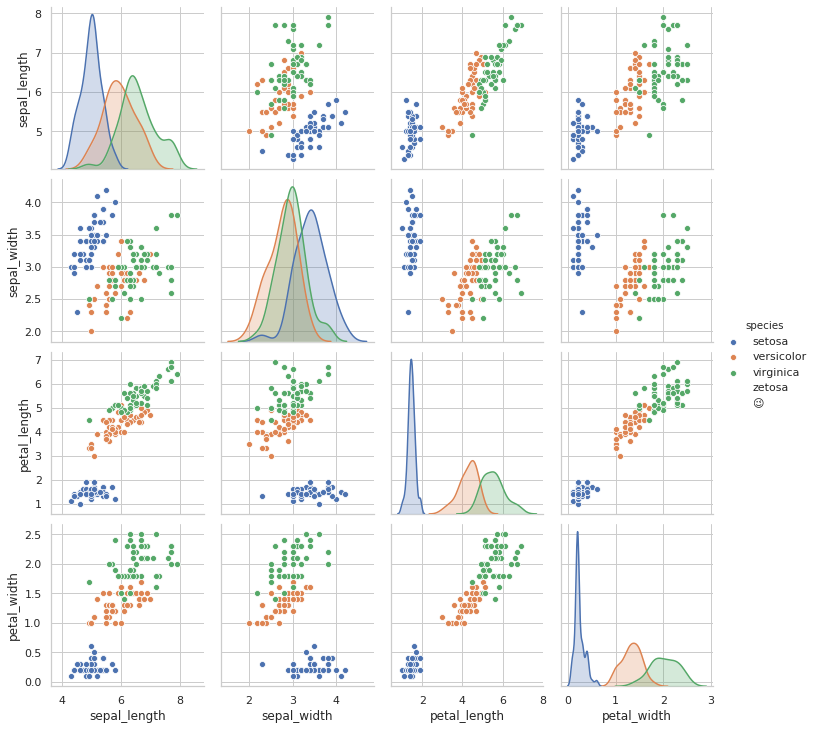

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")
sns.pairplot(clean_data, hue="species")

I suppose you mean the plots on the \ diagonal. 

For every flower species (color) and every feature (sepal and petal length/width) the graph shows the distribution of the amount of flowers with the certain length (y-axis here).

#### 4.2 **[2pt]** Plot the covariance matrix as a heatmap, adding the values on the squares as seen in the lecture's example. Explain what high values of covariance (>0.9 or <-0.9) mean from a statistical perspective, and the implications for the learning process.

Hint: could it be a "common data problem"? Also add the parameter `fmt=` to round to 1 decimal.

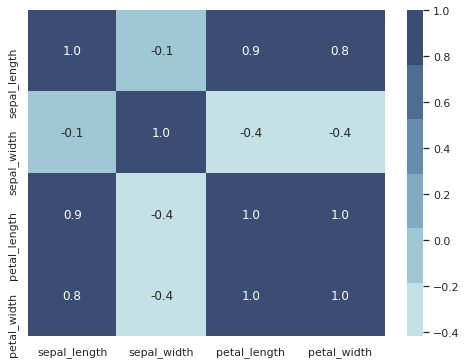

In [13]:
covmat = clean_data.corr()

sns.heatmap(covmat, cmap=sns.color_palette("ch:3,-.2,dark=.3"), annot=True, fmt='.1f')

The high value of the covariance means that this two features seem to have a high correlation between them. This maeans that they are somehow related (here, by a linear model). This means we can effectively learn from these data points and make pretty accurate predictions. 

#### 4.3 **[2pt]** Plot a violin plot of the features. Use a custom palette. Briefly explain the advantage of the violin plot over the box plot.

Palettes can be found [[here]](https://seaborn.pydata.org/tutorial/color_palettes.html). You can use `plt.xticks(rotation=45)` (or similar) to rotate the $x$ labels.

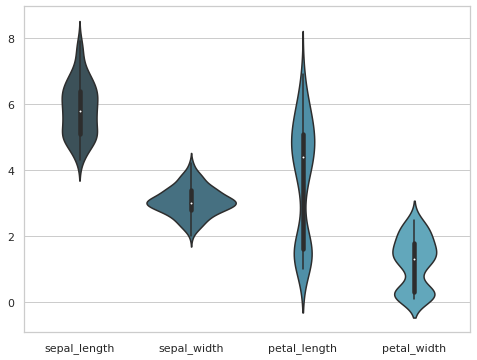

In [14]:
sns.violinplot(data=clean_data, palette=sns.color_palette("GnBu_d"))

The main advantages over the box plot is that we can precisely see the distribution of the data. Looking at petal_length and petal_width we can clearly see that there are two groups forming, one can use this as an indication for further data analysis. This is not possible with the box plot. One could say we "win" here an additional dimension!


# 5. Visualizing the performance

#### 5.1 **[2pt]** Use scikit-learn to train a Linear Regression to predict the petal length ($\hat{y}$) from the petal width ($x$). Generate the Prediction over Observation plot.

Careful, the integration between Pandas and Scikit-learn is [recent](https://medium.com/dunder-data/from-pandas-to-scikit-learn-a-new-exciting-workflow-e88e2271ef62). If you find it confusing, stick to numpy arrays:
```python
x = df['petal_width'].to_numpy().reshape((-1, 1))
y = df['petal_length'].to_numpy()
```
Remember scikit-learn needs 2D input (hence reshaping). To plot the diagonal line a simple `sns.lineplot([0,7],[0,7])` will suffice.

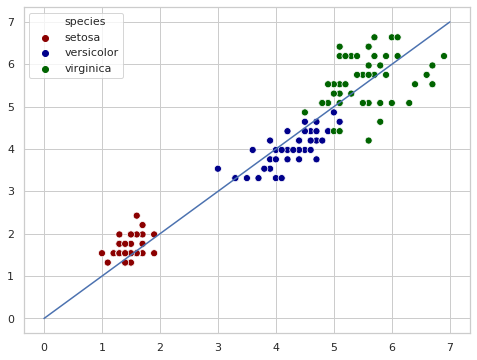

In [15]:
x = clean_data['petal_width'].to_numpy().reshape((-1, 1))
y = clean_data['petal_length'].to_numpy()

act_x = x.transpose()[0]
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()


# Train the model using the training sets
regr.fit(x, y)
#predictions
scikit_pred = regr.predict(x)

#plot predictions over observation
sns.scatterplot(y, scikit_pred,
      hue=clean_data['species'],
      palette=sns.color_palette(['darkred', 'darkblue', 'darkgreen']),
      s=50)


#y=x
sns.lineplot([0,7],[0,7])

#### 5.2 **[2pt]** Using the same model and predictions from the last point, generate the Errors over Predictions plot.

Here you want at least an horizontal line for $y=0$.

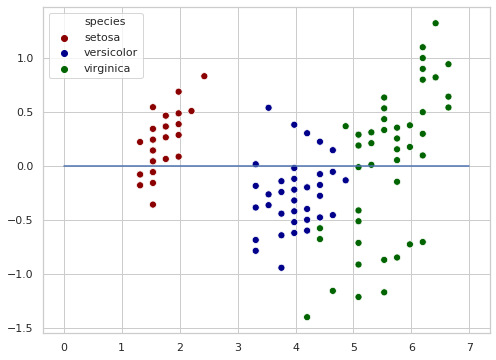

In [18]:
errors = list(map(lambda p: p[0]-p[1], zip(scikit_pred, y)))

sns.scatterplot(scikit_pred, errors,
      hue=clean_data['species'],
      palette=sns.color_palette(['darkred', 'darkblue', 'darkgreen']),
      s=50)

sns.lineplot([0,7],[0,0])

#### 5.3 **[2pt]** For both Prediction over Observation and Errors over Prediction, write a few sentences commenting on the performance of the model learned by the Linear Regression.

**Prediction over Observation**
Generally, the predictions were pretty accurate, if I might say so (but in the end it really boils down on how "accurate" someone wants to have his predictions/model). Looking at the species, one can clearly see that the petal length for the setosa and versicolor flowers were more accurate than for the viginica flower. You see this by looking at how the green points drift farther away from our $y=x$ line. 

**Errors over Predictions**
By looking at the errors over predictions, one can clearly see what I said above about the virginica flower. Here we have that the error drifts away for more than 1cm, while the setosa and versicolor flower were predicted with an accuracy of less than 1cm!

# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Follow [this tutorial](https://becominghuman.ai/linear-regression-in-python-with-pandas-scikit-learn-72574a2ec1a5) to augment your answers to point 5 with 5-fold cross-validation.

#### BONUS **[ZERO pt]** Follow [this tutorial](https://elitedatascience.com/python-seaborn-tutorial) but using our data, and generate all the plots of types that have not been mentioned in the lecture/lab. Comment a few sentences about which I think would be most useful to include in our set of basic plots for the next year.

#### BONUS **[ZERO pt]** Copy your Perceptron implementation from the second lab. Modify it so that at every update it computes the Risk (total Loss over all points) and saves it to a list (we did something similar at the first lab, remember?). Run your implementation on the data, then plot  the Risk over iteration using a `sns.lineplot()`.

If you discuss this point on Moodle I will participate :) plus it will give you an opportunity to find other people in class interested with going beyond the points, which I encourage teaming up together.

### Final considerations

- This lecture+lab actually gives you most of what you need for the high-pay job of Data Analyst, so I guess there is one direct market application from this course after all :)
- You will need to be strong in the topics seen so far to continue with the course.
- Fixing and polishing your assignments will make passing the exam so much easier. Now is the perfect chance to prepare the first 3.